# Saudi Arabia Hotels And Accommodation
### Capstone Project Management 
#### By ninja Girls


### Import Needed Libraries

In [38]:
import pandas as pd
import numpy as np

# import plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#import Scaler 
from sklearn.preprocessing import StandardScaler

## import Cluster models
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, AffinityPropagation

import matplotlib.cm as cm
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch

# import Scores 
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score, rand_score


### Import Dataset

In [163]:
df = pd.read_csv('Saudi Arabia Booking.csv')
df.head()

,Name,City,region,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Canelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Breakfst_included,Longitude_x,Latitude_y,Link
0,الريـم,Al-Ola,Al-Madinah,SAR 179,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Double Room,...,FREE cancellation,Max persons: 2,3 beds\n(3 large doubles),No,NaN,Not requierd,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,Copper Crown Furnished Apartments,Khamis-Mushait,Aseer,SAR 195,5,Only 2 rooms like this left on our site,5326174,9.0,169 reviews,Deluxe Room (2 Adults + 1 Child),...,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),No,Superb,Not requierd,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,فندق راية الشلال 2,Hafrel-Batin,Eastern Region,SAR 200,5,Only 3 rooms like this left on our site,5987844,8.7,17 reviews,Deluxe Double or Twin Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),No,Fabulous,Not requierd,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,Four Points by Sheraton Makkah Al Naseem,Makkah,Makkah,SAR 225,5,Only 5 rooms like this left on our site,3889445,8.7,"9,418 reviews",Superior Twin Room,...,FREE cancellation,Max persons: 2,2 beds\n(2 singles),Yes,Fabulous,Not requierd,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...
4,نزل الثريا للوحدات السكنية,Al-Tayef,Makkah,SAR 250,5,NaN,6284346,NaN,NaN,Budget Double Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),No,NaN,Not requierd,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...


In [164]:
#Show the dataframe datatypes
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

### Exclude Unneeded Columns

In [165]:
df= df.loc[:, ~df.columns.isin(['Name','Link','Review_title'])]

### Size of the Dataset 

In [166]:
df.shape

(1025, 18)

### Dataset Descriptive statistics Include Object type

In [167]:
df.describe(include=['O'])

,City,region,Price,Property_Demand,Customers_Review,Type_of_room,reservations_Payment,Canelation,Max_persons,Bed_type,Tax,Credit_card,Breakfst_included
count,1025,1025,1025,750,956,1024,1025,846,1025,1006,1025,1025,84
unique,75,13,312,14,610,236,3,1,12,65,2,2,1
top,Jeddah,Makkah,SAR 120,Only 1 left like this on our site,5 reviews,One-Bedroom Apartment,No prepayment,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),Yes,Not requierd,Breakfast included
freq,209,352,60,148,9,134,921,846,899,277,805,922,84


### Information about a DataFrame

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  1025 non-null   object 
 1   region                1025 non-null   object 
 2   Price                 1025 non-null   object 
 3   Star_Rating           1025 non-null   int64  
 4   Property_Demand       750 non-null    object 
 5   Property_id           1025 non-null   int64  
 6   Customers_Rating      956 non-null    float64
 7   Customers_Review      956 non-null    object 
 8   Type_of_room          1024 non-null   object 
 9   reservations_Payment  1025 non-null   object 
 10  Canelation            846 non-null    object 
 11  Max_persons           1025 non-null   object 
 12  Bed_type              1006 non-null   object 
 13  Tax                   1025 non-null   object 
 14  Credit_card           1025 non-null   object 
 15  Breakfst_included    

### Detect Missing Values

In [169]:
# Remove the colomns that has more than 70% missing values

df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=" ")
print('\n')
df = df2

List of dropped columns: Breakfst_included 



<AxesSubplot:>

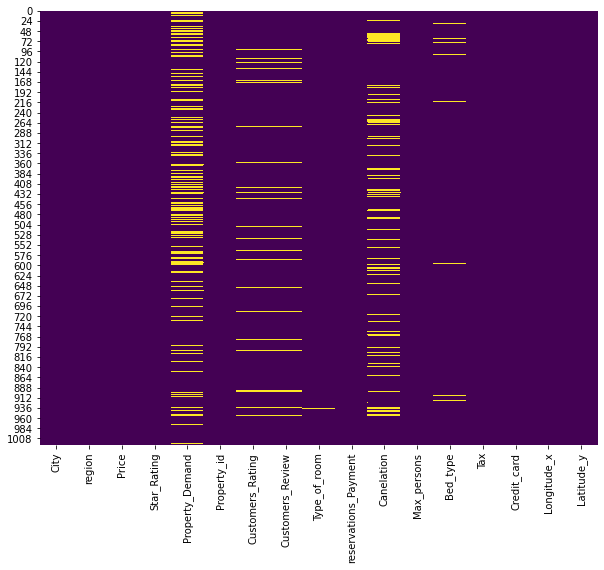

In [170]:
# plot heatmap for the missing values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [171]:
# Check the null values
df.isnull().sum()

City                      0
region                    0
Price                     0
Star_Rating               0
Property_Demand         275
Property_id               0
Customers_Rating         69
Customers_Review         69
Type_of_room              1
reservations_Payment      0
Canelation              179
Max_persons               0
Bed_type                 19
Tax                       0
Credit_card               0
Longitude_x               0
Latitude_y                0
dtype: int64

### Replace Some Columns Values

In [172]:
df['Canelation']=df['Canelation'].replace('FREE cancellation','FREE')

### Sort the DataFrame by 'Star_Rating' Columns

In [173]:
df.sort_values(by='Star_Rating',ascending=False,inplace =True)

### Fill Missing Values

In [174]:
df['Property_Demand'].value_counts()
df['Property_Demand'].fillna('No rooms Available',inplace=True)

In [175]:
df['Customers_Rating'].value_counts()
df['Customers_Rating'].fillna(method='bfill',inplace =True)

In [176]:
df['Customers_Review'].value_counts()
df['Customers_Review']=(df['Customers_Review'].replace( '[reviews,)]','', regex=True ).astype(float))
df['Customers_Review'].fillna(df['Customers_Review'].mean(),inplace =True)

In [177]:
df['Type_of_room'].value_counts()
df['Type_of_room'].fillna('Not Specified',inplace=True)

In [178]:
df['Canelation'].value_counts()
df['Canelation'].fillna('Not FREE', inplace=True)

In [179]:
df['Bed_type'].value_counts()
df['Bed_type'].fillna('Not Specified',inplace=True)

### Change Some Columns type

In [180]:
df['Price']=(df['Price'].replace( '[SAR,)]','', regex=True ).astype(float))

df['Customers_Rating']=df['Customers_Rating'].astype(float)

df['Customers_Review']=(df['Customers_Review'].replace( '[reviews,)]','', regex=True ).astype(int))

df['Max_persons']=(df['Max_persons'].replace( '[Max persons:,)]','', regex=True ).astype(int))


### Cheack Data Outliers

<AxesSubplot:>

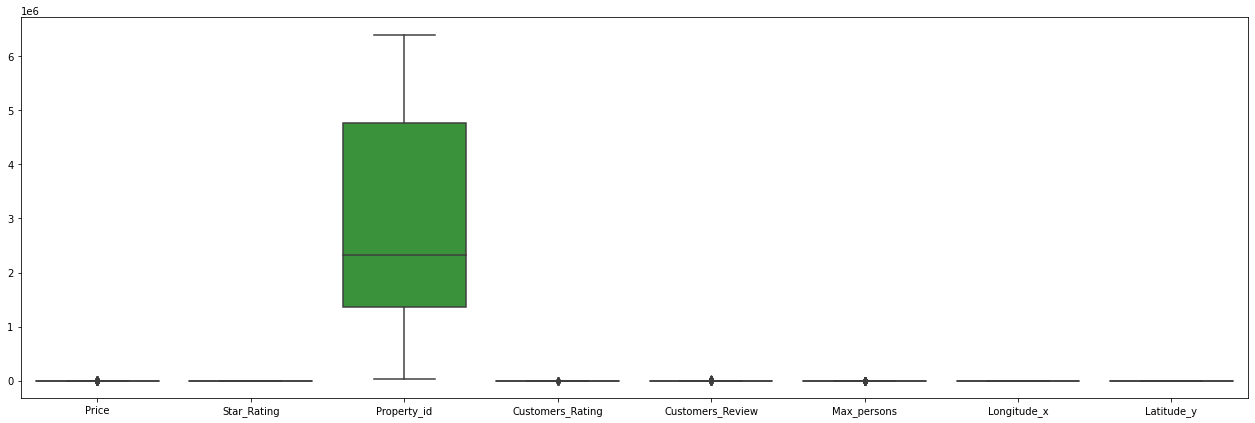

In [181]:
plt.figure(figsize=(22,7))
sns.boxplot(data=df)

### Visulization

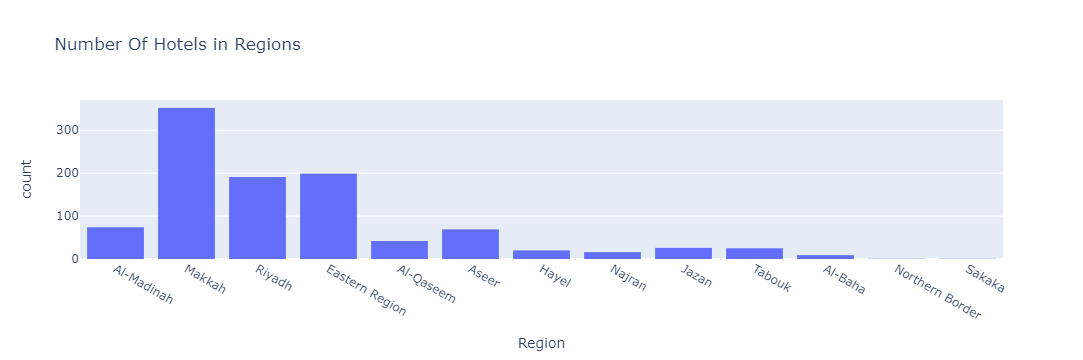

In [184]:
# plot histogram that represent the Number Of Hotels in each Regions
px.histogram(df, x = 'region', nbins = 20, title="Number Of Hotels in Regions",labels={'region':'Region', 'count':'#Hotel'})

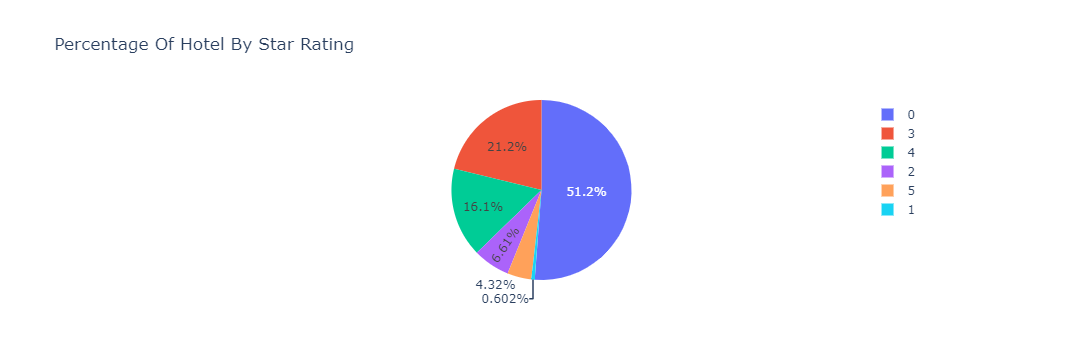

In [186]:
#plot pie chart to represent Percentage Of Hotels By Star rating
px.pie(df, values='Property_id', names='Star_Rating', title='Percentage Of Hotel By Star Rating')


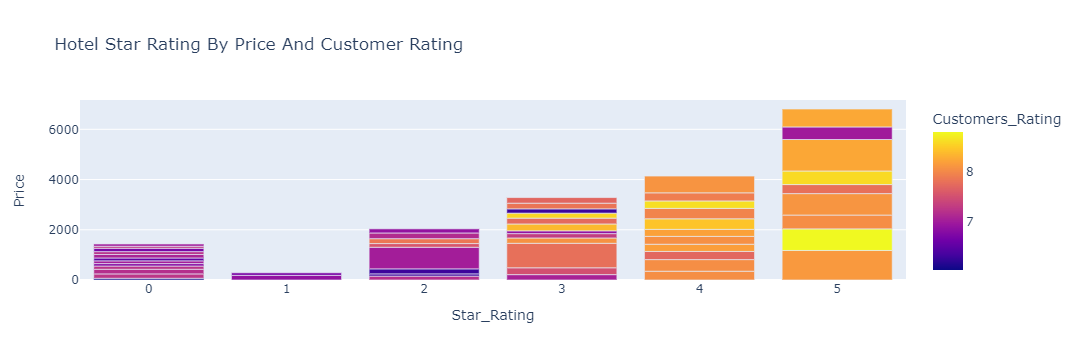

In [188]:
# plot bar chart that represent the Hotel Star Rating By Price And Customer Rating
rig= df.groupby(['region','Star_Rating']).mean().reset_index()

px.bar( data_frame =rig, x='Star_Rating', y='Price', color='Customers_Rating', labels={'Star Rating':'Hotel Satr'},
       title="Hotel Star Rating By Price And Customer Rating")


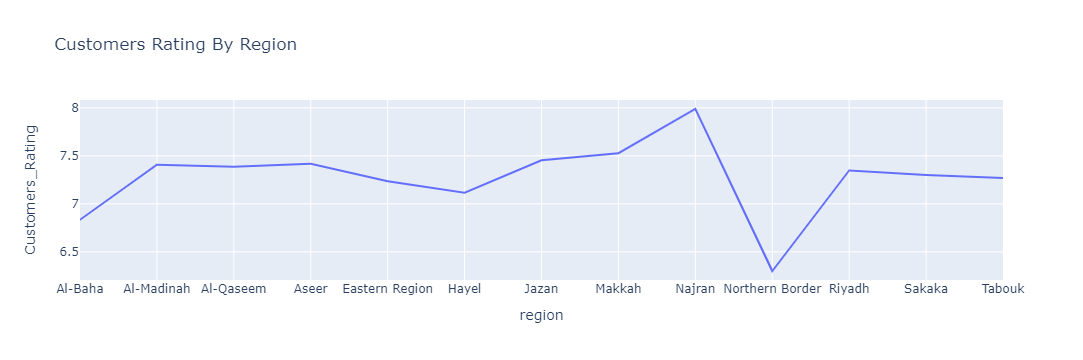

In [190]:
# line chart represent the customer rating by region
rig= df.groupby('region').mean().reset_index()

px.line( data_frame =rig,x='region', y='Customers_Rating', title = 'Customers Rating By Region')

### Pairplot to show the relationship between variables 

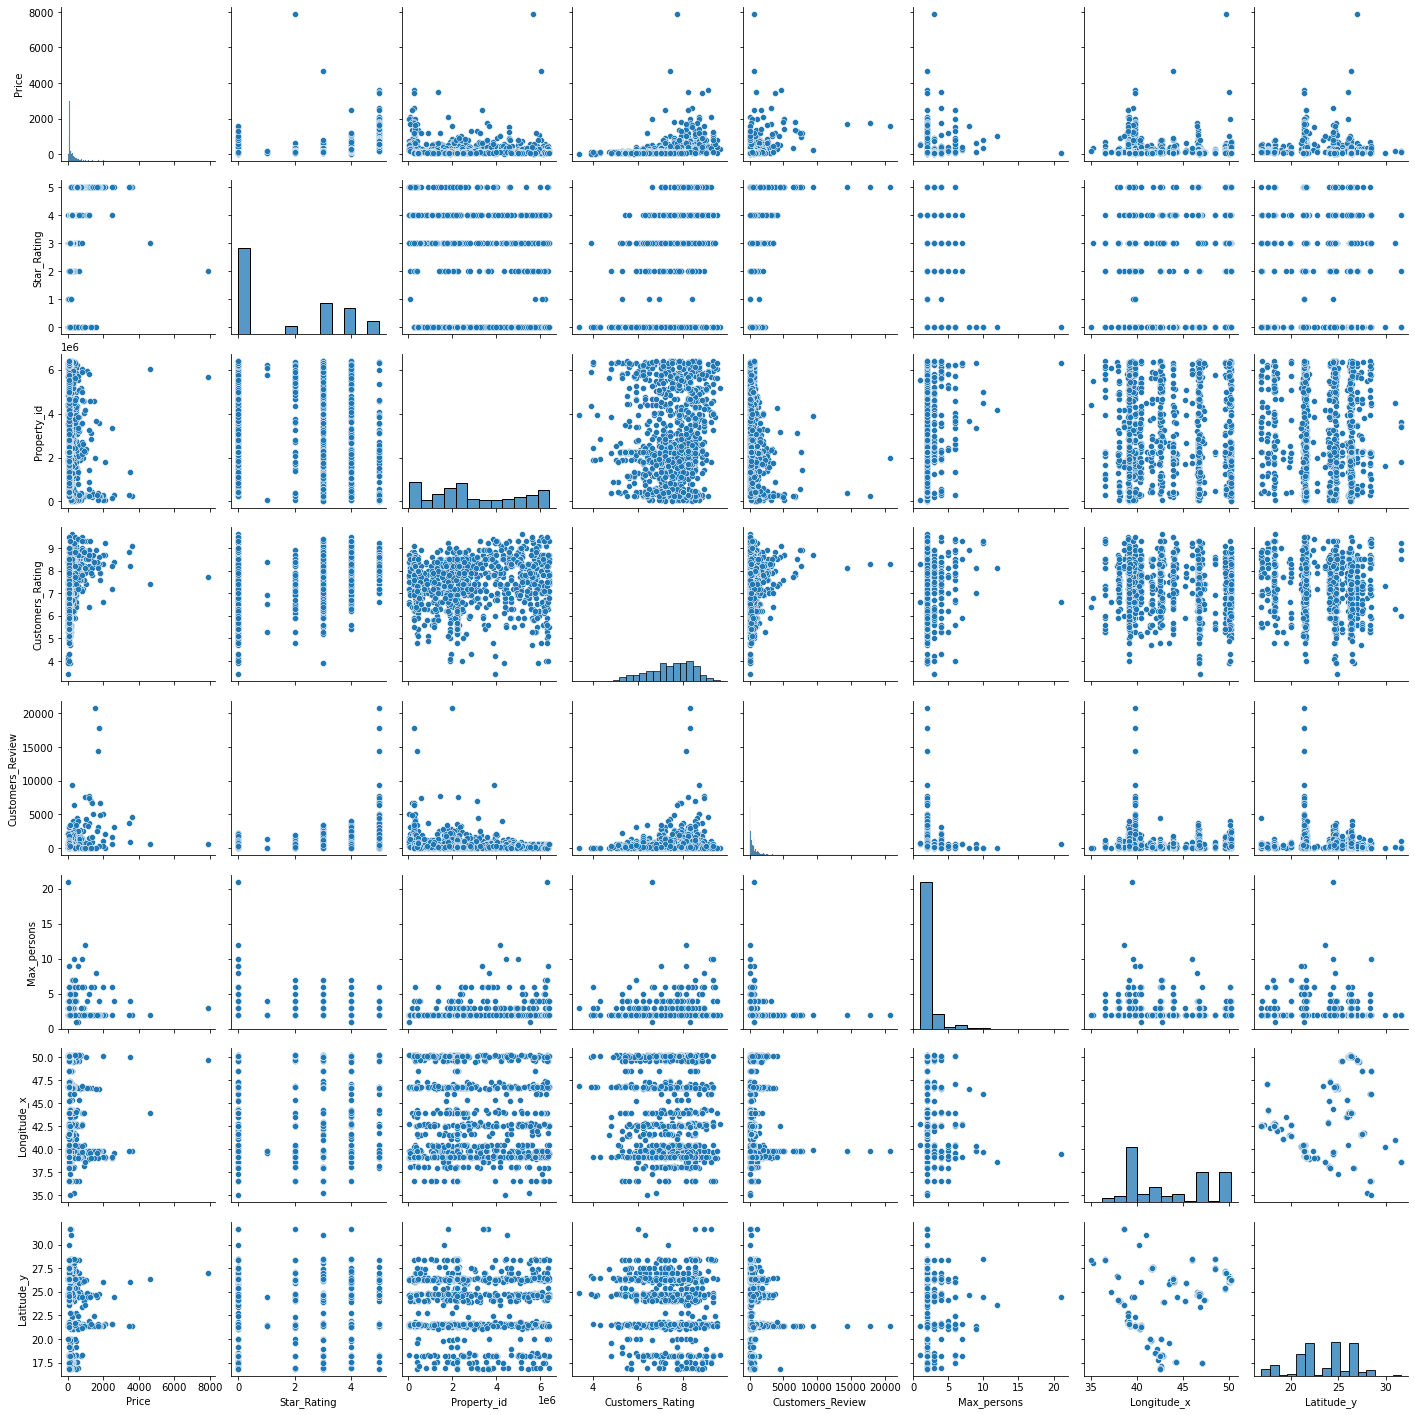

In [191]:
sns.pairplot(df)

### Show correlation between variables 

In [193]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,Price,Star_Rating,Property_id,Customers_Rating,Customers_Review,Max_persons,Longitude_x,Latitude_y
Price,1.000000,0.406184,-0.101960,0.271204,0.352280,0.135195,-0.040768,-0.021041
Star_Rating,0.406184,1.000000,-0.059043,0.443458,0.367651,-0.062203,0.015602,-0.026927
Property_id,-0.101960,-0.059043,1.000000,0.097225,-0.229784,0.180448,-0.051951,-0.087186
Customers_Rating,0.271204,0.443458,0.097225,1.000000,0.172466,0.037761,-0.086648,-0.084595
Customers_Review,0.352280,0.367651,-0.229784,0.172466,1.000000,-0.065543,-0.071541,-0.060005
Max_persons,0.135195,-0.062203,0.180448,0.037761,-0.065543,1.000000,-0.084716,-0.028246
Longitude_x,-0.040768,0.015602,-0.051951,-0.086648,-0.071541,-0.084716,1.000000,0.465511
Latitude_y,-0.021041,-0.026927,-0.087186,-0.084595,-0.060005,-0.028246,0.465511,1.000000


### Featurs for clustering the data

In [151]:
X = df[['Price', 'Customers_Rating']]

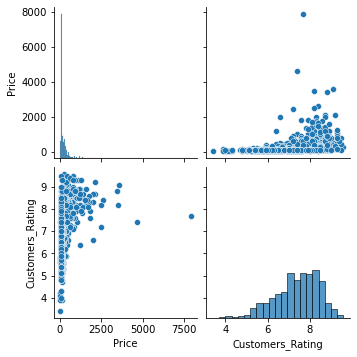

In [194]:
# plot the features
sns.pairplot(X)


### Scale Data

In [152]:
scaler = StandardScaler()

# Fit & transform data.
scaled_df = scaler.fit_transform(X)
scaled_df

array([[-0.19938552,  0.75575057],
       [ 1.50988816,  0.75575057],
       [ 2.39667088,  1.13293588],
       ...,
       [-0.40777946,  0.47286159],
       [-0.40777946, -1.41306497],
       [-0.29693162,  1.79301018]])

In [153]:
# original dataframe to test the rand_ score for the models
newDf= df.iloc[:, [2,6]]

### The Elbow Method

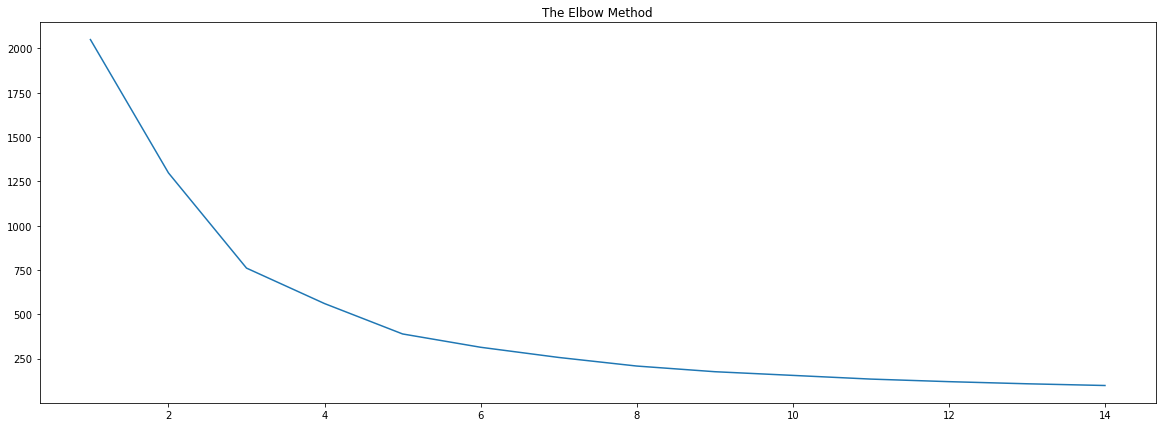

In [195]:
# Elbow method is a heuristic used in determining the number of clusters in a data set

plt.figure(figsize = (20, 7))
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)  
    
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.show()

### KMeans Model

For n_clusters = 3 The average silhouette_score is : 0.4951710348474845
For n_clusters = 4 The average silhouette_score is : 0.5015993923075064
For n_clusters = 5 The average silhouette_score is : 0.4640683105018808


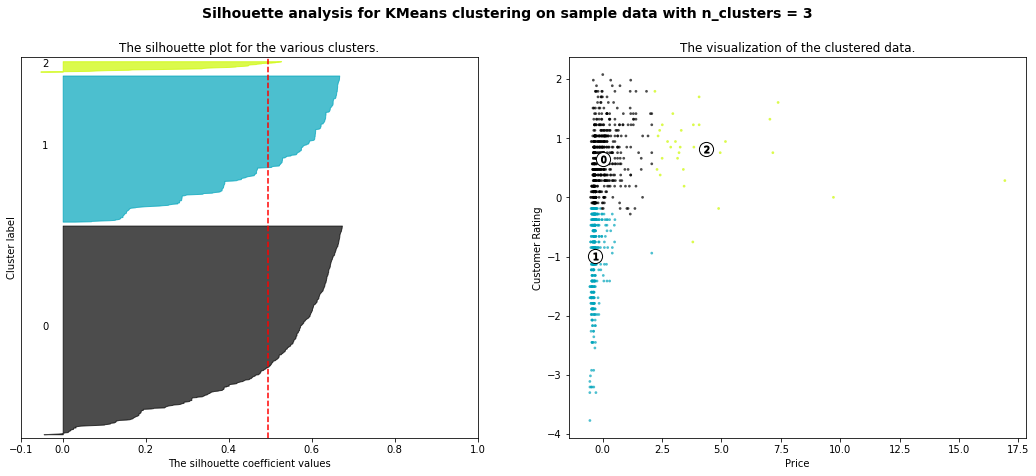

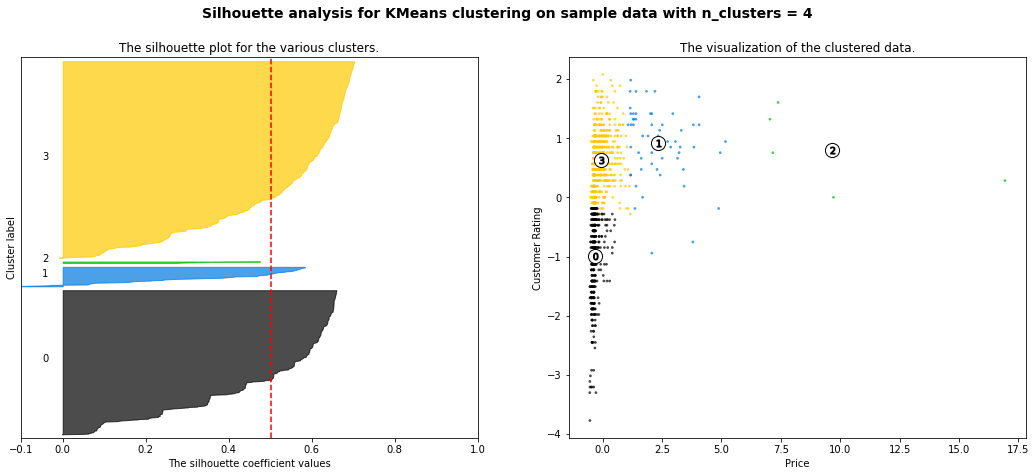

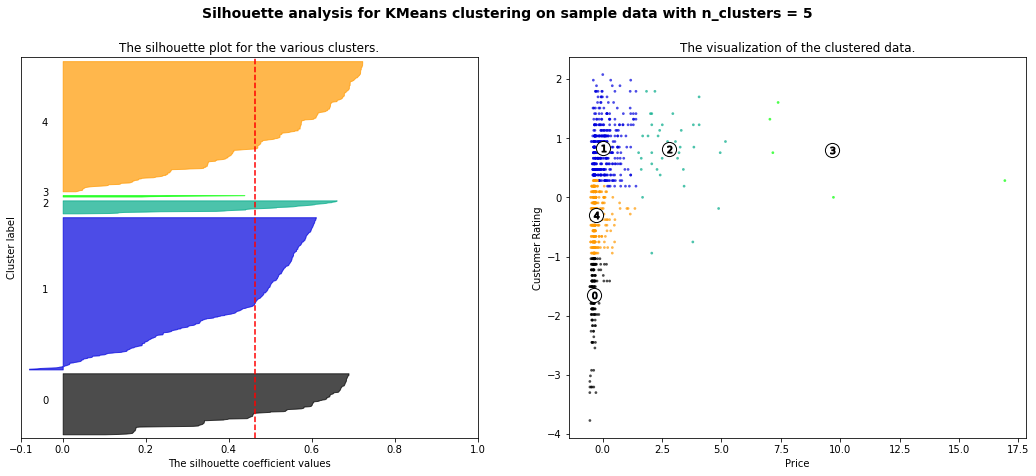

In [196]:
# This helps us to detremine the best number of clusters based on score
range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_df[:, 0], scaled_df[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Price")
    ax2.set_ylabel("Customer Rating")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [208]:
# from the scores and plot above, we choose 4 as a number of clusters because it has a higher score
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(scaled_df)

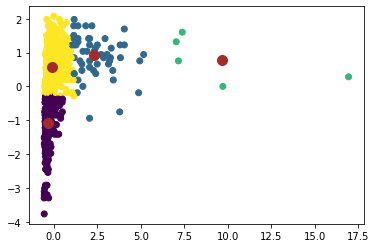

In [209]:
#plot Kmeans Cluster
plt.scatter(scaled_df[:,0], scaled_df[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'brown', label = 'Centroids')


In [236]:
#because the ground truth labels are not known, evaluation must be performed using the model itself.

#higher Silhouette Coefficient score relates to a model with better defined clusters
print('Silhouette Coefficient score:\n',silhouette_score(scaled_df, kmeans.labels_, metric='euclidean'))

#higher Calinski-Harabasz score relates to a model with better defined clusters.
print('\nCalinski-Harabasz score:\n',calinski_harabasz_score(scaled_df, kmeans.labels_))

#lower Davies-Bouldin index relates to a model with better separation between the clusters.
print('\nDavies-Bouldin index:\n', davies_bouldin_score(scaled_df, kmeans.labels_))

#Rand Score
print('\nRand Score:\n',rand_score(kmeans.fit_predict(newDf), y_kmeans))

Silhouette Coefficient score:
 0.24116065996028657

Calinski-Harabasz score:
 326.4890953067809

Davies-Bouldin index:
 0.9352162305654349

Rand Score:
 0.5498227896341463


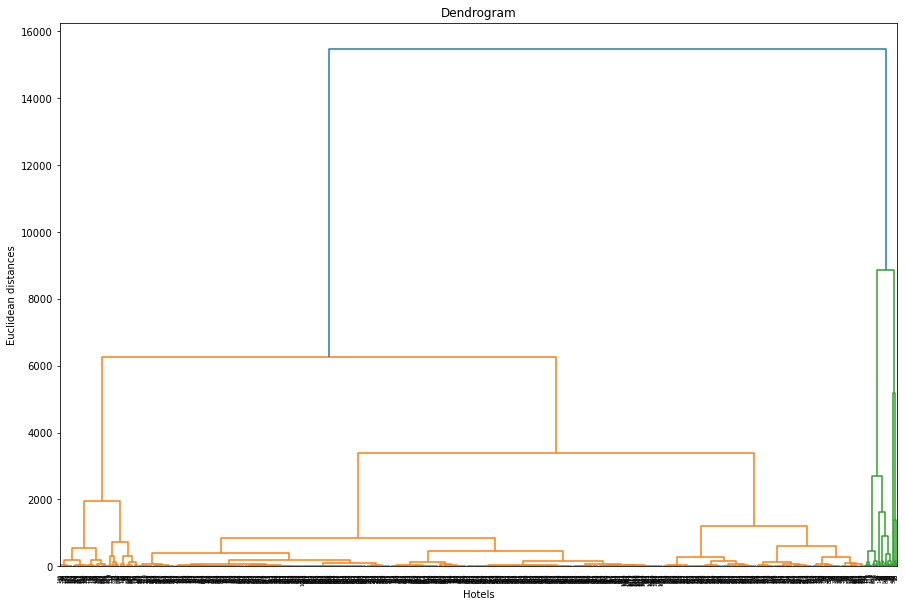

In [211]:
# plot dendogram to choose the minimum number of clusters 

plt.figure(figsize=(15,10))
cluster_visualising=sch.dendrogram(sch.linkage(df.iloc[:,[2,6]].values,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Hotels')
plt.ylabel('Euclidean distances')
plt.show()

### AgglomerativeClustering Model

In [159]:
agglomerative = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_agglomerative= agglomerative.fit_predict(scaled_df)

In [160]:
aggLabel = agglomerative.labels_
aggLabel

array([0, 2, 2, ..., 0, 1, 0], dtype=int64)

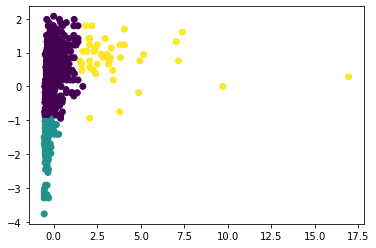

In [199]:
# plot Agglomerative Clustering
plt.scatter(scaled_df[:,0], scaled_df[:,1], c=aggLabel)


In [162]:
# print the scores 
print('Silhouette Coefficient score:\n',silhouette_score(scaled_df, aggLabel, metric='euclidean'))

print('\nCalinski-Harabasz score:\n',calinski_harabasz_score(scaled_df, aggLabel))

print('\nDavies-Bouldin index:\n', davies_bouldin_score(scaled_df, aggLabel))

print('\nRand Score:\n',rand_score(agglomerative.fit_predict(newDf), y_agglomerative))

Silhouette Coefficient score:
 0.5002508359881236

Calinski-Harabasz score:
 717.2354287414985

Davies-Bouldin index:
 0.6321671404084648

Rand Score:
 0.7048037347560976


In [202]:
# plot distances using NearestNeighbors to choose eps and min_samples value
neigh = NearestNeighbors(n_neighbors = 2) 
nbrs = neigh.fit(scaled_df) 

distances, indices = nbrs.kneighbors(scaled_df)

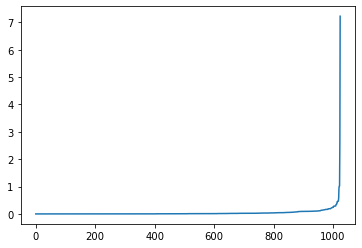

In [203]:
distances = np.sort(distances, axis = 0) 
distances = distances[: , 1] 
plt.plot(distances)


### DBSCAN Model

In [61]:
db = DBSCAN(eps=0.3, min_samples=6)
y_db = db.fit_predict(scaled_df)

In [62]:
dbLabels = db.labels_
dbLabels

array([ 0, -1, -1, ...,  0,  0,  0], dtype=int64)

In [63]:
n_clusters_ = len(set(dbLabels)) - (1 if -1 in dbLabels else 0)
n_clusters_

2

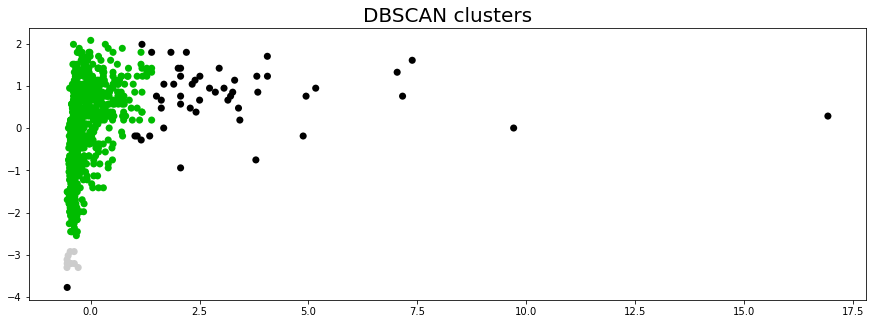

In [204]:
# plot DBSCAN Cluster

plt.figure(figsize=(15,5))
plt.scatter(scaled_df[:,0], scaled_df[:,1], c= dbLabels, cmap='nipy_spectral', s=50, edgecolor='none')
plt.title('DBSCAN clusters', fontsize = 20)
plt.show()

In [125]:
# print the scores 
print('Silhouette Coefficient score:\n',silhouette_score(scaled_df, dbLabels , metric='euclidean'))

print('\nCalinski-Harabasz score:\n',calinski_harabasz_score(scaled_df, dbLabels))

print('\nDavies-Bouldin index: \n', davies_bouldin_score(scaled_df, dbLabels))

print('\nRand Score:\n',rand_score(db.fit_predict(newDf), y_db))


Silhouette Coefficient score:
 0.5193048029023623

Calinski-Harabasz score:
 248.9869487072056

Davies-Bouldin index: 
 0.6485846266774032

Rand Score:
 0.5443921493902439


### BIRCH Model

In [69]:
birch = Birch(threshold=0.01, n_clusters=3)
y_birch=birch.fit_predict(scaled_df)

In [70]:
bLabels = birch.labels_
bLabels

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [71]:
bclusters = len(set(bLabels)) - (1 if -1 in bLabels else 0)
bclusters

3

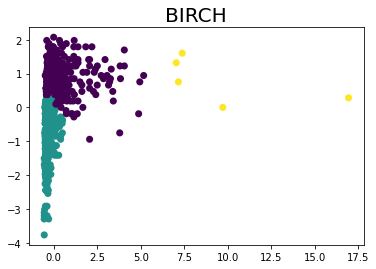

In [205]:
# plot BIRCH Cluster

plt.scatter(scaled_df[:,0], scaled_df[:,1],c=bLabels, s=50, edgecolor='none')
plt.title('BIRCH', fontsize = 20)

plt.show()

In [126]:
# print the scores 
print('Silhouette Coefficient score:\n',silhouette_score(scaled_df, bLabels, metric='euclidean'))

print('\nCalinski-Harabasz score:\n',calinski_harabasz_score(scaled_df, bLabels))

print('\nDavies-Bouldin index: \n', davies_bouldin_score(scaled_df, bLabels))

print('\nRand Score:\n',rand_score(birch.fit_predict(newDf), y_birch))


Silhouette Coefficient score:
 0.45712100197133365

Calinski-Harabasz score:
 683.8091752739404

Davies-Bouldin index: 
 0.695456897033278

Rand Score:
 0.5232869664634147


### AffinityPropagation Model

In [92]:
affinityPropagation = AffinityPropagation(damping = 0.6, random_state= 123)
y_affinityPropagation = affinityPropagation.fit_predict(scaled_df)

In [93]:
mLabels = affinityPropagation.labels_
mLabels

array([20,  0, 10, ..., 25, 33, 14], dtype=int64)

In [94]:
n_clusters = len(set(mLabels)) - (1 if -1 in mLabels else 0)
n_clusters

34

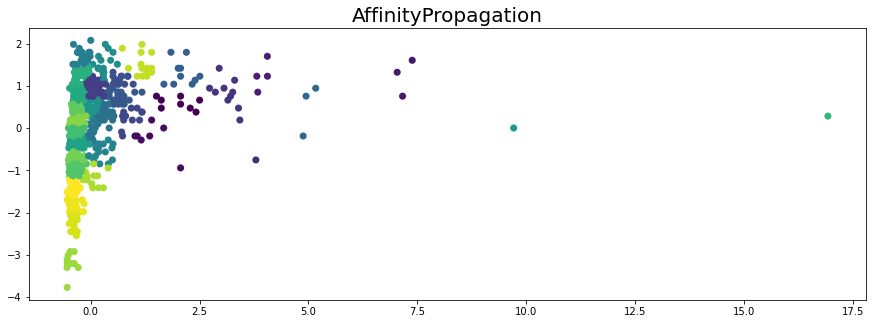

In [206]:
# plot Affinity Propagation Cluster
plt.figure(figsize=(15,5))
plt.scatter(scaled_df[:,0], scaled_df[:,1],c=mLabels, s=50, edgecolor='none')
plt.title('AffinityPropagation', fontsize = 20)
plt.show()

In [127]:
# print the scores 
print('Silhouette Coefficient score:\n',silhouette_score(scaled_df, mLabels, metric='euclidean'))

print('\nCalinski-Harabasz score:\n',calinski_harabasz_score(scaled_df, mLabels))

print('\nDavies-Bouldin index: \n', davies_bouldin_score(scaled_df, mLabels))

print('\nRand Score:\n',rand_score(affinityPropagation.fit_predict(newDf), y_affinityPropagation))


Silhouette Coefficient score:
 0.4035411491157457

Calinski-Harabasz score:
 1982.5309134129839

Davies-Bouldin index: 
 0.6864619578401311

Rand Score:
 0.052145579268292684


C:\Users\mos\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.



### Cluster Model Evaluation 

- Silhouette Coefficient score:
  - The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
  - The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
  
- Calinski-Harabasz score:
  - The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
  - The score is fast to compute.
  
- Davies-Bouldin index:
  - The computation of Davies-Bouldin is simpler than that of Silhouette scores.
  - The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances.
  
- Rand Score
  - The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

## The Final Result

In [216]:
# print the dataframe with cluster 
df['KMeans Cluster']= y_kmeans

df['Agglomerative Cluster']= y_agglomerative

df['DBSCAN Clustring']= y_db

df['BIRCH Clustring']= y_birch

df['Affinity Propagation']= y_affinityPropagation

df

,City,region,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,reservations_Payment,...,Credit_card,Longitude_x,Latitude_y,KMeans Cluster,Agglomerative Clustering,DBSCAN Clustring,BIRCH,Affinity Propagation,Agglomerative Cluster,BIRCH Clustring
0,Al-Ola,Al-Madinah,179.0,5,Only 1 room left like this on our site,6330099,8.2,668,Economy Double Room,No prepayment,...,Not requierd,37.917525,26.648656,3,0,0,0,20,0,0
53,Makkah,Makkah,950.0,5,No rooms Available,2258749,8.2,7642,Twin Guest Room,No prepayment,...,Not requierd,39.820047,21.423000,1,2,-1,0,0,2,0
61,Riyadh,Riyadh,1350.0,5,No rooms Available,418602,8.6,943,Premium Room King Bed,No prepayment,...,Not requierd,46.675643,24.711915,1,2,-1,0,10,2,0
60,Makkah,Makkah,1320.0,5,No rooms Available,3129791,8.5,6942,Deluxe King Room with Partial Haram View,No prepayment,...,Not requierd,39.819571,21.425705,1,2,-1,0,10,2,0
59,Jeddah,Makkah,1200.0,5,Only 5 like this left on our site,3241649,8.2,1458,Junior Villa,No prepayment,...,Not requierd,39.079549,21.722148,1,2,-1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Buraidah,Al-Qaseem,85.0,0,Only 2 like this left on our site,445908,8.0,713,Deluxe Double Room,No prepayment,...,Not requierd,43.964843,26.367390,3,0,0,0,25,0,0
663,Jeddah,Makkah,85.0,0,Only 2 like this left on our site,2798725,6.0,329,Deluxe Double Room,No prepayment,...,Not requierd,39.210963,21.571017,0,1,0,1,33,1,1
662,Abha,Aseer,85.0,0,Only 1 left like this on our site,5510872,7.9,100,Studio,No prepayment,...,Not requierd,42.519657,18.207687,3,0,0,0,25,0,0
661,Al-Tayef,Makkah,85.0,0,No rooms Available,4971607,5.9,471,Deluxe Studio,No prepayment,...,Not requierd,40.431118,21.305158,0,1,0,1,33,1,1


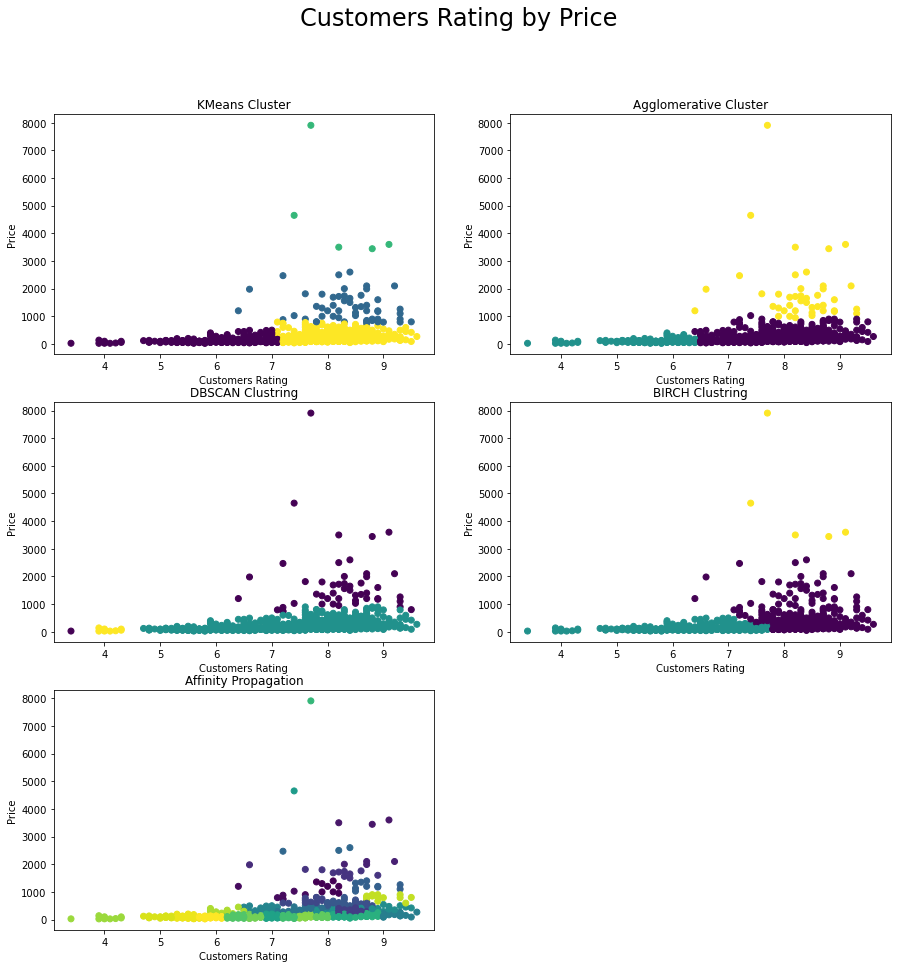

In [235]:
# Plot all models


plt.figure(figsize=(15, 15)).suptitle('Customers Rating by Price', fontsize=24)

plt.subplot(3, 2, 1)
plt.scatter(x=df['Customers_Rating'], y=df['Price'], c= df['KMeans Cluster'] )
plt.xlabel('Customers Rating')
plt.ylabel('Price')
plt.title('KMeans Cluster')

plt.subplot(3, 2, 2)
plt.scatter(x=df['Customers_Rating'], y=df['Price'], c= df['Agglomerative Cluster'] )
plt.xlabel('Customers Rating')
plt.ylabel('Price')
plt.title('Agglomerative Cluster')


plt.subplot(3, 2, 3)
plt.scatter(x=df['Customers_Rating'], y=df['Price'], c= df['DBSCAN Clustring'] )
plt.xlabel('Customers Rating')
plt.ylabel('Price')
plt.title('DBSCAN Clustring')


plt.subplot(3, 2, 4)
plt.scatter(x=df['Customers_Rating'], y=df['Price'], c= df['BIRCH Clustring'] )
plt.xlabel('Customers Rating')
plt.ylabel('Price')
plt.title('BIRCH Clustring')

plt.subplot(3, 2, 5)
plt.scatter(x=df['Customers_Rating'], y=df['Price'], c= df['Affinity Propagation'] )
plt.xlabel('Customers Rating')
plt.ylabel('Price')
plt.title('Affinity Propagation')
